<class 'numpy.ndarray'>


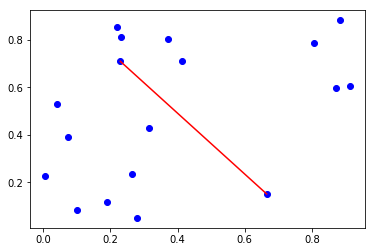

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def warm_up():
    points = np.random.rand(18,2)
    print(type(points))
    # plot all the points
    plt.plot(points[:, 0], points[:, 1], 'bo')
    # example line drawn between 2 points.
    plt.plot([points[0, 0], points[1, 0]], [points[0, 1], points[1,1]], 'r-')
    plt.show()
    
warm_up()

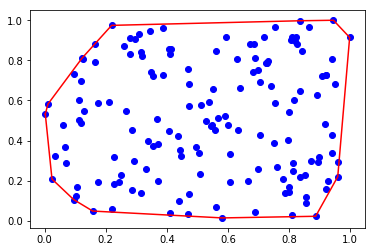

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, acos, pi, sin

def jarvis(points):
    """implement the jarvis march convex hull algorithm"""
    start_point = leftmost(points)
    hull = [start_point]
    last_point = [start_point[0], 0]
    open_set = [[x,y] for x,y in points]
    open_set.remove(start_point)
    # print("hull initialised to ", hull)
    count = 0
    s = start_point
    while True:
        min_angle = 2*pi
        if count == 3:
            # this is a hack to make sure we don't look at the start point until the first 2 points of the
            # hull are complete, otherwise we end up dividing by zero
            open_set.append(start_point)
        count += 1
        for p in open_set:
            lines = {'x1': last_point[0], 'y1': last_point[1], 'x2': s[0], 'y2': s[1], 'x3': p[0], 'y3': p[1]}
            angle = angle_between(lines)
            if angle < min_angle:
                min_angle = angle
                candidate = [lines['x3'], lines['y3']]
            # print("trying", p, "with an angle of ", angle, "current best=", min_angle)
        last_point = s
        s = candidate
        # print("adding", s, "to hull with angle of", min_angle)
        hull.append(s)
        if not open_set or candidate == hull[0]:
            break
        open_set.remove(s)
    return hull

def angle_between(L):
    """ returns the reflex angle between the two lines,
    line1: (L['x1'], L['y1']) and (L['x2'], L['y2'])
    line2: (L['x2'], L['y2']) and (L['x3'], L['y3'])"""
    a = sqrt((L['x2']-L['x1'])**2+(L['y2']-L['y1'])**2)
    b = sqrt((L['x3']-L['x2'])**2+(L['y3']-L['y2'])**2)
    c = sqrt((L['x3']-L['x1'])**2+(L['y3']-L['y1'])**2)
    height = 2*herons(a,b,c)/c  # area=base*height/2
    th1 = acos(height/a)
    th2 = acos(height/b)
    check_right_lean = sin(th1) * a
    check_left_lean = sin(th2) * b
    if(check_right_lean > c):
        # the 'height' line does not bisect th1
        return 2*pi - th1 + th2
    if(check_left_lean > c):
        # the 'height' line does not bisect th2
        return 2*pi + th1 - th2
    return 2*pi - th1 - th2

def herons(a, b, c):
    """ Heron's formula for working out the area of a SSS triangle"""
    s = (a+b+c)/2  # semiperimeter
    return sqrt(s*(s-a)*(s-b)*(s-c))  # Heron's formula
    
def leftmost(points):
    i,j = points[0]
    for x,y in points:
        if i < x:
            continue
        i,j = x,y
    return [i,j]
    
def main():
    # unit tests
    assert(herons(4,13,15) == 24)
    assert(angle_between({'x1': 0, 'y1': 0, 'x2': 0, 'y2': 4, 'x3': 3, 'y3': 4}) == 6*pi/4)
    assert(leftmost([[1,2],[2,3],[3,4],[4,5]]) == [1,2])
    points = np.random.rand(150,2)
    plt.plot(points[:, 0], points[:, 1], 'bo')
    hull = np.array(jarvis(points))
    plt.plot(hull[:, 0], hull[:, 1], 'r-')
    plt.show()
    
main()